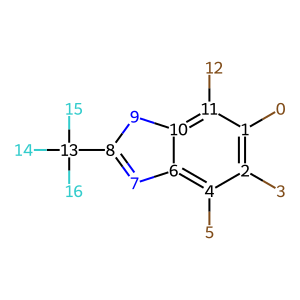

In [24]:
from rdkit import Chem
from rdkit.Chem import Draw

# Crear la molécula desde el SMILES
smiles = 'Brc1c(Br)c(Br)c2N=C(Nc2c1Br)C(F)(F)F'

mol = Chem.MolFromSmiles(smiles)

# Configurar etiquetas personalizadas para mostrar los índices de los átomos
for atom in mol.GetAtoms():
    atom.SetProp('atomLabel', str(atom.GetIdx()))

# Dibujar la molécula con los índices
img = Draw.MolToImage(mol, size=(300, 300))

img

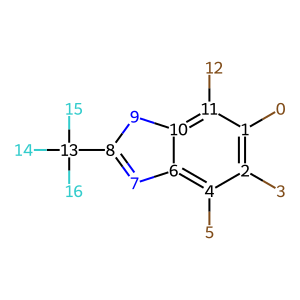

In [25]:
# Configurar etiquetas personalizadas para mostrar los índices de los átomos
for atom in mol.GetAtoms():
    atom.SetProp('atomLabel', str(atom.GetIdx()))

# Dibujar la molécula con los índices
img = Draw.MolToImage(mol, size=(300, 300))

img

In [31]:
# Crear una copia kekulizada de la molécula
kekulized_mol = Chem.Mol(mol)
Chem.Kekulize(kekulized_mol, clearAromaticFlags=True)

# Step 1: Identificar todos los anillos
ring_info = mol.GetRingInfo()
atom_rings = ring_info.AtomRings()

# Step 2: Obtener solo los anillos aromáticos
aromatic_rings = [
    ring
    for ring in atom_rings
    if all(mol.GetAtomWithIdx(idx).GetIsAromatic() for idx in ring)
]

# Step 3: Procesar anillos no exclusivamente de carbonos
for ring in aromatic_rings:
    # Verificar si todos los átomos son carbono
    if not all(mol.GetAtomWithIdx(idx).GetSymbol() == "C" for idx in ring):
        # Desmarcar aromaticidad para los átomos del anillo
        for idx in ring:
            mol.GetAtomWithIdx(idx).SetIsAromatic(False)
        
        # Desmarcar aromaticidad para los enlaces del anillo
        for i in range(len(ring)):
            atom1, atom2 = ring[i], ring[(i + 1) % len(ring)]
            bond = mol.GetBondBetweenAtoms(atom1, atom2)

            # Tomar el tipo de enlace de la molécula kekulizada
            kekulized_bond = kekulized_mol.GetBondBetweenAtoms(atom1, atom2)
            bond.SetBondType(kekulized_bond.GetBondType())

# Step 4: Reprocesar anillos exclusivamente de carbonos
for ring in aromatic_rings:
    if all(mol.GetAtomWithIdx(idx).GetSymbol() == "C" for idx in ring):
        # Restaurar aromaticidad para los átomos
        for idx in ring:
            mol.GetAtomWithIdx(idx).SetIsAromatic(True)

        # Restaurar aromaticidad para los enlaces
        for i in range(len(ring)):
            atom1, atom2 = ring[i], ring[(i + 1) % len(ring)]
            bond = mol.GetBondBetweenAtoms(atom1, atom2)
            bond.SetBondType(Chem.rdchem.BondType.AROMATIC)

# Supongamos que `mol` ya ha sido procesado con los pasos anteriores
# Verificación final: Mostrar la aromaticidad de cada átomo y enlace
print("Átomos:")
for atom in mol.GetAtoms():
    print(f"Átomo {atom.GetIdx()} ({atom.GetSymbol()}): {'Aromático' if atom.GetIsAromatic() else 'No aromático'}")

print("\nEnlaces:")
for bond in mol.GetBonds():
    bond_type = bond.GetBondType()
    aromatic_status = "Aromático" if bond_type == Chem.rdchem.BondType.AROMATIC else "No aromático"
    print(
        f"Enlace {bond.GetBeginAtomIdx()}-{bond.GetEndAtomIdx()} ({bond_type}): {aromatic_status}"
    )


Átomos:
Átomo 0 (Br): No aromático
Átomo 1 (C): Aromático
Átomo 2 (C): Aromático
Átomo 3 (Br): No aromático
Átomo 4 (C): Aromático
Átomo 5 (Br): No aromático
Átomo 6 (C): Aromático
Átomo 7 (N): No aromático
Átomo 8 (C): No aromático
Átomo 9 (N): No aromático
Átomo 10 (C): Aromático
Átomo 11 (C): Aromático
Átomo 12 (Br): No aromático
Átomo 13 (C): No aromático
Átomo 14 (F): No aromático
Átomo 15 (F): No aromático
Átomo 16 (F): No aromático

Enlaces:
Enlace 0-1 (SINGLE): No aromático
Enlace 1-2 (AROMATIC): Aromático
Enlace 2-3 (SINGLE): No aromático
Enlace 2-4 (AROMATIC): Aromático
Enlace 4-5 (SINGLE): No aromático
Enlace 4-6 (AROMATIC): Aromático
Enlace 6-7 (SINGLE): No aromático
Enlace 7-8 (DOUBLE): No aromático
Enlace 8-9 (SINGLE): No aromático
Enlace 9-10 (SINGLE): No aromático
Enlace 10-11 (AROMATIC): Aromático
Enlace 11-12 (SINGLE): No aromático
Enlace 8-13 (SINGLE): No aromático
Enlace 13-14 (SINGLE): No aromático
Enlace 13-15 (SINGLE): No aromático
Enlace 13-16 (SINGLE): No aromá

In [23]:
mol.GetSubstructMatches(Chem.MolFromSmarts('[c][C]'))

((0, 1),)

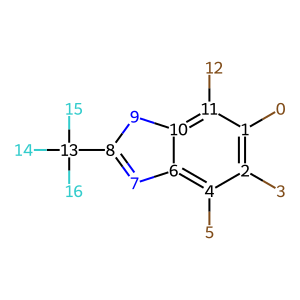

In [8]:
# Configurar etiquetas personalizadas para mostrar los índices de los átomos
for atom in mol.GetAtoms():
    atom.SetProp('atomLabel', str(atom.GetIdx()))

# Dibujar la molécula con los índices
img = Draw.MolToImage(mol, size=(300, 300))

img

In [21]:
bond.GetValenceContrib(atoms[8])

1.0

In [1]:
from rdkit import Chem

# Cargar la molécula
smiles = 'Brc1c(Br)c(Br)c2N=C(Nc2c1Br)C(F)(F)F'
mol = Chem.MolFromSmiles(smiles)

# Deshacer la aromaticidad de la molécula
Chem.Kekulize(mol, clearAromaticFlags=True)

# Convertir a MolBlock y reinicializar
mol_block = Chem.MolToMolBlock(mol)
mol = Chem.MolFromMolBlock(mol_block)

# Verificar los resultados
for atom in mol.GetAtoms():
    print(f"Atom {atom.GetIdx()} ({atom.GetSymbol()}): Aromatic={atom.GetIsAromatic()}")

for bond in mol.GetBonds():
    print(f"Bond {bond.GetBeginAtomIdx()}-{bond.GetEndAtomIdx()}: Type={bond.GetBondType()} Aromatic={bond.GetIsAromatic()}")


Atom 0 (Br): Aromatic=False
Atom 1 (C): Aromatic=True
Atom 2 (C): Aromatic=True
Atom 3 (Br): Aromatic=False
Atom 4 (C): Aromatic=True
Atom 5 (Br): Aromatic=False
Atom 6 (C): Aromatic=True
Atom 7 (N): Aromatic=True
Atom 8 (C): Aromatic=True
Atom 9 (N): Aromatic=True
Atom 10 (C): Aromatic=True
Atom 11 (C): Aromatic=True
Atom 12 (Br): Aromatic=False
Atom 13 (C): Aromatic=False
Atom 14 (F): Aromatic=False
Atom 15 (F): Aromatic=False
Atom 16 (F): Aromatic=False
Bond 0-1: Type=SINGLE Aromatic=False
Bond 1-2: Type=AROMATIC Aromatic=True
Bond 2-3: Type=SINGLE Aromatic=False
Bond 2-4: Type=AROMATIC Aromatic=True
Bond 4-5: Type=SINGLE Aromatic=False
Bond 4-6: Type=AROMATIC Aromatic=True
Bond 6-7: Type=AROMATIC Aromatic=True
Bond 7-8: Type=AROMATIC Aromatic=True
Bond 8-9: Type=AROMATIC Aromatic=True
Bond 9-10: Type=AROMATIC Aromatic=True
Bond 10-11: Type=AROMATIC Aromatic=True
Bond 11-12: Type=SINGLE Aromatic=False
Bond 8-13: Type=SINGLE Aromatic=False
Bond 13-14: Type=SINGLE Aromatic=False
Bond 

In [2]:
# Configurar etiquetas personalizadas para mostrar los índices de los átomos
for atom in mol.GetAtoms():
    atom.SetProp('atomLabel', str(atom.GetIdx()))

# Dibujar la molécula con los índices
img = Draw.MolToImage(mol, size=(300, 300))

img

NameError: name 'Draw' is not defined

In [3]:
bond = mol.GetBondBetweenAtoms(7, 8)

In [4]:
bond.GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

In [44]:
bond.GetSmarts()

'='

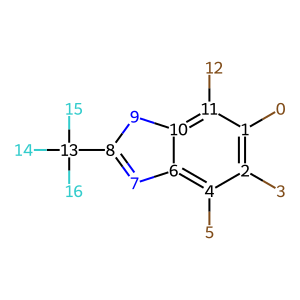

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# Cargar la molécula
smiles = 'Brc1c(Br)c(Br)c2N=C(Nc2c1Br)C(F)(F)F'
mol = Chem.MolFromSmiles(smiles)

# Deshacer la aromaticidad de la molécula
Chem.Kekulize(mol, clearAromaticFlags=True)

# Configurar etiquetas personalizadas para mostrar los índices de los átomos
for atom in mol.GetAtoms():
    atom.SetProp('atomLabel', str(atom.GetIdx()))

# Dibujar la molécula con los índices
img = Draw.MolToImage(mol, size=(300, 300))

img

In [23]:
atoms = mol.GetAtoms()

atoms[7].GetSymbol()

'N'

In [16]:
bond = mol.GetBondBetweenAtoms(7, 8)

In [17]:
bond.GetBondType()

rdkit.Chem.rdchem.BondType.DOUBLE

In [18]:
bond.SetIntProp('bondType', 2)

In [21]:
mol.GetSubstructMatches(Chem.MolFromSmarts("[C;R]"))

((1,), (2,), (4,), (6,), (8,), (10,), (11,))